In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [4]:
# Memasukan data latih
data_train = pd.read_excel("data_train.xlsx")
data_train.head(11)

,file,R,G,B,Coklat,Kuning,Jumlah Coklat,Jumlah Kuning,kelas
0,healthy (1).JPG,124,139,98,0,0,0,0,healthy
1,healthy (2).JPG,77,109,89,0,0,0,0,healthy
2,healthy (3).JPG,143,180,129,0,0,0,0,healthy
3,healthy (4).JPG,86,110,90,0,0,0,0,healthy
4,healthy (5).JPG,76,107,89,0,0,0,0,healthy
5,healthy (6).JPG,121,167,136,0,0,0,0,healthy
6,healthy (7).JPG,133,160,117,0,0,0,0,healthy
7,healthy (8).JPG,158,190,138,0,0,0,2,healthy
8,healthy (9).JPG,112,136,85,0,0,0,0,healthy
9,healthy (10).JPG,96,135,101,0,0,0,0,healthy


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file           480 non-null    object
 1   R              480 non-null    int64 
 2   G              480 non-null    int64 
 3   B              480 non-null    int64 
 4   Coklat         480 non-null    int64 
 5   Kuning         480 non-null    int64 
 6   Jumlah Coklat  480 non-null    int64 
 7   Jumlah Kuning  480 non-null    int64 
 8   kelas          480 non-null    object
dtypes: int64(7), object(2)
memory usage: 33.9+ KB


In [6]:
data_train.empty

False

In [7]:
en = LabelEncoder()

data_train['kelas'] = en.fit_transform(data_train['kelas'])
data_train.head()

,file,R,G,B,Coklat,Kuning,Jumlah Coklat,Jumlah Kuning,kelas
0,healthy (1).JPG,124,139,98,0,0,0,0,1
1,healthy (2).JPG,77,109,89,0,0,0,0,1
2,healthy (3).JPG,143,180,129,0,0,0,0,1
3,healthy (4).JPG,86,110,90,0,0,0,0,1
4,healthy (5).JPG,76,107,89,0,0,0,0,1


<Axes: >

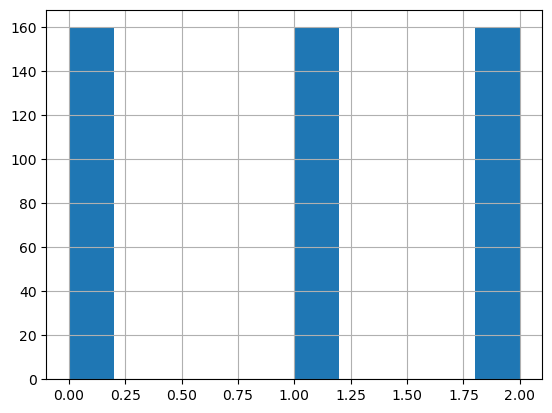

In [8]:
data_train["kelas"].hist()

In [9]:

dataset_train = data_train.drop(["file"], axis=1)
dataset_train.head(11)

,R,G,B,Coklat,Kuning,Jumlah Coklat,Jumlah Kuning,kelas
0,124,139,98,0,0,0,0,1
1,77,109,89,0,0,0,0,1
2,143,180,129,0,0,0,0,1
3,86,110,90,0,0,0,0,1
4,76,107,89,0,0,0,0,1
5,121,167,136,0,0,0,0,1
6,133,160,117,0,0,0,0,1
7,158,190,138,0,0,0,2,1
8,112,136,85,0,0,0,0,1
9,96,135,101,0,0,0,0,1


In [10]:
x_train = dataset_train.iloc[:,:-1].values
y_train = dataset_train.iloc[:, -1].values

In [11]:
x_train

array([[124, 139,  98, ...,   0,   0,   0],
       [ 77, 109,  89, ...,   0,   0,   0],
       [143, 180, 129, ...,   0,   0,   0],
       ...,
       [ 60,  94,  84, ...,   1,   1, 106],
       [ 60,  86,  73, ...,   1,   0, 105],
       [ 66,  89,  87, ...,   1,   2,  46]], dtype=int64)

In [12]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [13]:
# Memasukan data test
data_test = pd.read_excel("data_test.xlsx")
data_test.head(11)

,file,R,G,B,Coklat,Kuning,Jumlah Coklat,Jumlah Kuning,kelas
0,healthy (1).JPG,130,149,106,0,0,0,0,healthy
1,healthy (2).JPG,96,145,121,0,0,0,4,healthy
2,healthy (3).JPG,66,133,93,0,0,0,1,healthy
3,healthy (4).JPG,157,176,121,0,0,0,1,healthy
4,healthy (5).JPG,113,144,123,0,0,0,0,healthy
5,healthy (6).JPG,94,131,103,0,0,0,0,healthy
6,healthy (7).JPG,81,137,100,0,0,0,1,healthy
7,healthy (8).JPG,120,159,132,0,0,0,0,healthy
8,healthy (9).JPG,95,137,86,0,0,0,0,healthy
9,healthy (10).JPG,71,131,85,0,0,0,0,healthy


In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file           120 non-null    object
 1   R              120 non-null    int64 
 2   G              120 non-null    int64 
 3   B              120 non-null    int64 
 4   Coklat         120 non-null    int64 
 5   Kuning         120 non-null    int64 
 6   Jumlah Coklat  120 non-null    int64 
 7   Jumlah Kuning  120 non-null    int64 
 8   kelas          120 non-null    object
dtypes: int64(7), object(2)
memory usage: 8.6+ KB


In [15]:
data_test.empty

False

In [16]:
data_test['kelas'] = en.fit_transform(data_test['kelas'])
data_test.head()

,file,R,G,B,Coklat,Kuning,Jumlah Coklat,Jumlah Kuning,kelas
0,healthy (1).JPG,130,149,106,0,0,0,0,1
1,healthy (2).JPG,96,145,121,0,0,0,4,1
2,healthy (3).JPG,66,133,93,0,0,0,1,1
3,healthy (4).JPG,157,176,121,0,0,0,1,1
4,healthy (5).JPG,113,144,123,0,0,0,0,1


<Axes: >

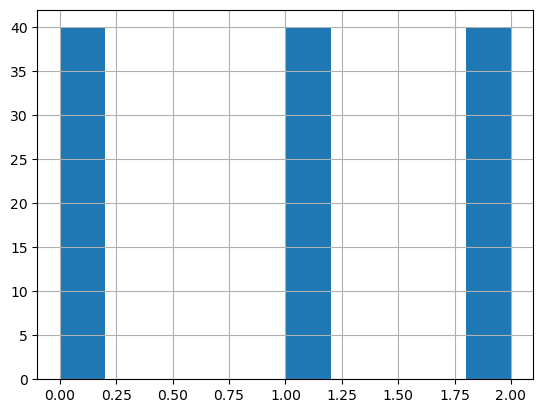

In [17]:
data_test["kelas"].hist()

In [18]:
dataset_test = data_test.drop(["file"], axis=1)
dataset_test.head(11)

,R,G,B,Coklat,Kuning,Jumlah Coklat,Jumlah Kuning,kelas
0,130,149,106,0,0,0,0,1
1,96,145,121,0,0,0,4,1
2,66,133,93,0,0,0,1,1
3,157,176,121,0,0,0,1,1
4,113,144,123,0,0,0,0,1
5,94,131,103,0,0,0,0,1
6,81,137,100,0,0,0,1,1
7,120,159,132,0,0,0,0,1
8,95,137,86,0,0,0,0,1
9,71,131,85,0,0,0,0,1


In [19]:
x_test = dataset_test.iloc[:,:-1].values
y_test = dataset_test.iloc[:,-1].values

In [20]:
x_test

array([[130, 149, 106,   0,   0,   0,   0],
       [ 96, 145, 121,   0,   0,   0,   4],
       [ 66, 133,  93,   0,   0,   0,   1],
       [157, 176, 121,   0,   0,   0,   1],
       [113, 144, 123,   0,   0,   0,   0],
       [ 94, 131, 103,   0,   0,   0,   0],
       [ 81, 137, 100,   0,   0,   0,   1],
       [120, 159, 132,   0,   0,   0,   0],
       [ 95, 137,  86,   0,   0,   0,   0],
       [ 71, 131,  85,   0,   0,   0,   0],
       [ 82, 125,  99,   0,   0,   0,   8],
       [101, 141, 120,   0,   0,   0,   2],
       [ 82, 120,  92,   0,   0,   0,   1],
       [ 63, 117,  83,   0,   0,   0,   3],
       [ 94, 127, 112,   0,   0,   0,   8],
       [ 61,  93,  72,   0,   0,   0,   0],
       [ 98, 128, 109,   0,   0,   0,   0],
       [137, 156, 112,   0,   0,   0,   0],
       [114, 150, 125,   0,   0,   0,   2],
       [ 58, 104,  70,   0,   0,   0,   0],
       [106, 137, 114,   0,   0,   0,   2],
       [162, 179, 139,   0,   0,   0,   2],
       [117, 176, 147,   0,   0,

In [21]:

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  480
x_test =  120
y_train =  480
y_test =  120


In [22]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
x_train

array([[ 1.65796005,  0.93590317,  0.32435683, ..., -1.4010578 ,
        -0.83115113, -1.00014137],
       [ 0.0221158 ,  0.0639437 , -0.03273326, ..., -1.4010578 ,
        -0.83115113, -1.00014137],
       [ 2.31925879,  2.12758113,  1.55433379, ..., -1.4010578 ,
        -0.83115113, -1.00014137],
       ...,
       [-0.56957254, -0.37203604, -0.23111664, ...,  0.71374643,
        -0.30690338,  1.19383953],
       [-0.56957254, -0.60455857, -0.66756008, ...,  0.71374643,
        -0.83115113,  1.17314159],
       [-0.36074136, -0.51736262, -0.11208661, ...,  0.71374643,
         0.21734438, -0.04803645]])

In [24]:
x_test

array([[ 1.86679123,  1.22655633,  0.64177024, -1.18830144, -1.4010578 ,
        -0.83115113, -1.00014137],
       [ 0.68341454,  1.11029507,  1.23692038, -1.18830144, -1.4010578 ,
        -0.83115113, -0.91734964],
       [-0.36074136,  0.76151128,  0.12597345, -1.18830144, -1.4010578 ,
        -0.83115113, -0.97944344],
       [ 2.80653154,  2.01131987,  1.23692038, -1.18830144, -1.4010578 ,
        -0.83115113, -0.97944344],
       [ 1.27510288,  1.08122975,  1.31627373, -1.18830144, -1.4010578 ,
        -0.83115113, -1.00014137],
       [ 0.61380415,  0.70338065,  0.52274021, -1.18830144, -1.4010578 ,
        -0.83115113, -1.00014137],
       [ 0.16133659,  0.87777254,  0.40371018, -1.18830144, -1.4010578 ,
        -0.83115113, -0.97944344],
       [ 1.51873926,  1.51720949,  1.67336382, -1.18830144, -1.4010578 ,
        -0.83115113, -1.00014137],
       [ 0.64860934,  0.87777254, -0.15176329, -1.18830144, -1.4010578 ,
        -0.83115113, -1.00014137],
       [-0.18671538,  0.7033

In [25]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [26]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2])

In [29]:
classifier.predict_proba(x_test)

array([[0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000

In [38]:
# Menghitung tingkat akurasi menggunakan accuracy_score dari sklearn
akurasi = accuracy_score(y_test,y_pred)

# Menampilkan tingkat akurasi dalam persentase
print("tingkat akurasi : %d persen"%(akurasi*100))

tingkat akurasi : 73 persen


In [37]:
# cm adalah confusion matrix yang sudah di hitung
cm = confusion_matrix(y_test, y_pred)

# Nama kelas atau label
class_names = ["Class 0", "Class 1", "Class 2"]

# Konversi matriks ke DataFrame dengan nama baris dan kolom
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Tampilkan DataFrame
print(cm_df)

         Class 0  Class 1  Class 2
Class 0       13        0       27
Class 1        0       39        1
Class 2        4        0       36


In [39]:
# Menghitung klasifikasi
akurasi = classification_report(y_test, y_pred)

# Menampilkan klasifikasi
print(akurasi)

              precision    recall  f1-score   support

           0       0.76      0.33      0.46        40
           1       1.00      0.97      0.99        40
           2       0.56      0.90      0.69        40

    accuracy                           0.73       120
   macro avg       0.78      0.73      0.71       120
weighted avg       0.78      0.73      0.71       120

